In [1]:
import sys
sys.path.append("..")
from vos_dataset import VOSDataset, get_loader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

In [33]:
config = {
    "description": "Positional embed before cross attention. No sparse embeddings. Pos embed wt has shape (256)",
    "precision": "32",
    "num_devices": 1,
    "num_epochs": 300,
    "save_log_weights_interval": 20,
    "metric_train_eval_interval": 20,
    "model_checkpoint_at": "checkpoints",
    "img_size": 1024,
    "out_dir": "/",
    "focal_wt": 20,
    "num_tokens": 1,
    "opt": {
        "learning_rate": 4e-4, #1e-4
        "auto_lr": False,
        "weight_decay": 1e-4,
        "decay_factor": 1/2,
        "steps": [100, 250],
    },
    "model": {
        "type": "vit_l",
        "checkpoint": "sam_vit_l_0b3195.pth",
        "requires_grad": {
            "image_encoder": False,
            "prompt_encoder": False,
            "mask_decoder": False,
            "propagation_module": True,
        },
    },
    "dataset": {
        "name": "moca",
        "root_dir": "../raw/",
        "train_split": 0.8, # Only for MoCA
        "stage1": True,
        "batch_size": 4,
        "max_num_obj": 3,
        "num_frames": 3,
        "max_jump": 5,
        "num_workers": 4,
        "pin_memory": False,
        "persistent_workers": True,
    },
}


# First use cpu to load models. Pytorch Lightning will automatically move it to GPUs.
cfg = OmegaConf.create(config).dataset

In [34]:
train, val = get_loader(cfg)

Training Samples:  56
56 out of 56 videos accepted in ../raw/MoCA-Mask/MoCA_Video/TrainDataset_per_sq.
Validation Samples:  15
15 out of 15 videos accepted in ../raw/MoCA-Mask/MoCA_Video/TrainDataset_per_sq.


In [35]:
x = next(iter(train))

In [36]:
for i in x:
    try:
        print(i, x[i].shape, x[i].dtype, x[i].mean(), x[i].min())
    except:
        print(i, x[i][0])

image torch.Size([4, 3, 3, 1024, 1024]) torch.float32 tensor(0.0112) tensor(-2.1179)
gt_mask tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0.,

In [37]:
x['prev_masks'][0].min(), x['prev_masks'][0].max(), x['prev_masks'][0].unique()

(tensor(0.), tensor(1.), tensor([0., 1.]))

In [38]:
x['gt_mask'][0].min(), x['gt_mask'][0].max(), x['gt_mask'][0].unique()

(tensor(0.), tensor(1.), tensor([0., 1.]))

In [39]:
x['cropped_img'][0][0].min(), x['cropped_img'][0][0].max(), x['cropped_img'][0][0].unique()

(tensor(0, dtype=torch.uint8),
 tensor(255, dtype=torch.uint8),
 tensor([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
          14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
          28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
          42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
          56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,
          70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
          84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
          98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
         112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123, 124, 125, 126,
         127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
         155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166

(<matplotlib.image.AxesImage at 0x7fa2a2374ee0>, 'markhor')

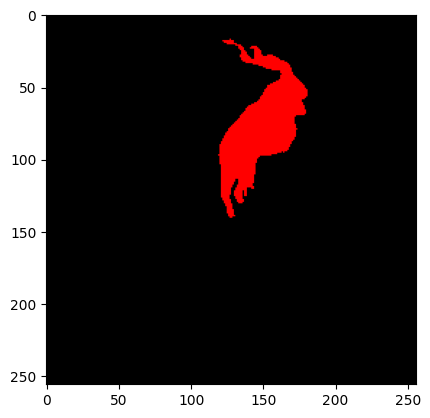

In [40]:
# plt.imshow(x['image'][0][0].permute(1,2,0).numpy())
plt.imshow(x['prev_masks'][0][0].permute(1,2,0).numpy()), x['name'][0]

In [44]:
x['cropped_img'][0]

[tensor([[[124, 124, 124,  ..., 124, 124, 124],
          [124, 124, 124,  ..., 124, 124, 124],
          [124, 124, 124,  ..., 124, 124, 124],
          ...,
          [124, 124, 124,  ..., 124, 124, 124],
          [124, 124, 124,  ..., 124, 124, 124],
          [124, 124, 124,  ..., 124, 124, 124]],
 
         [[114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          ...,
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114],
          [114, 114, 114,  ..., 114, 114, 114]],
 
         [[102, 102, 102,  ..., 102, 102, 102],
          [102, 102, 102,  ..., 102, 102, 102],
          [102, 102, 102,  ..., 102, 102, 102],
          ...,
          [102, 102, 102,  ..., 102, 102, 102],
          [102, 102, 102,  ..., 102, 102, 102],
          [102, 102, 102,  ..., 102, 102, 102]]], dtype=torch.uint8),
 tensor([[[121, 121, 121,  ..., 121, 121, 121],
          [121,

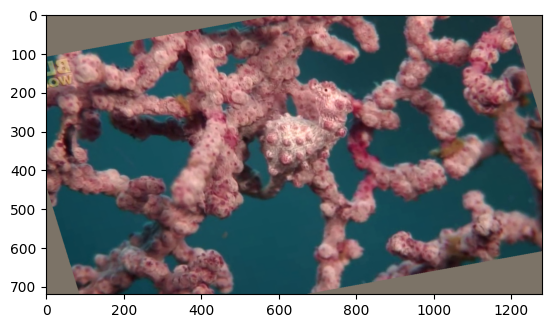

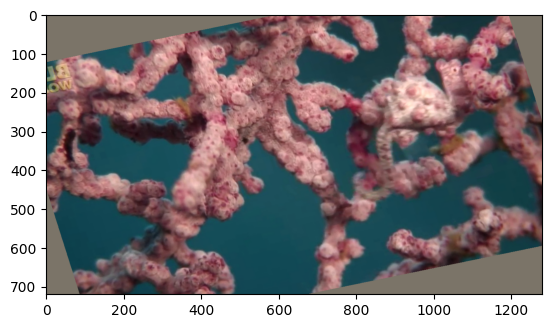

In [47]:
for i in range(2):
    plt.figure()
    plt.imshow(x['cropped_img'][2][i].permute(1, 2, 0), cmap="gray")
    # plt.imshow(x['prev_masks'])

In [ ]:
from PIL import Image
import numpy as np

a = Image.open("/home/mnawfal29/Desktop/project-c/raw/MoCA-Mask/MoCA_Video/TestDataset_per_sq/arctic_fox/GT/00005.png").convert("P")

In [ ]:
(np.array(a)//255).dtype

In [ ]:
np.unique(np.array(a)//255)

In [ ]:
x["image"].shape

In [ ]:
x[0]["cropped_img"].shape

In [ ]:
import numpy as np
np.unique(x[0]['gt_mask'])

In [ ]:
for k in x[0]:
    try:
        print(k, x[0][k].shape, type(x[0][k]))
    except:
        print(k, x[0][k])
x[0]['selector']

In [ ]:
plt.imshow(x[0]["gt_mask"][0])

In [ ]:
for i in range(2):
    plt.imshow(x[0]['prev_masks'][i][0], cmap='jet', alpha=0.5)
    plt.figure()

In [ ]:
plt.imshow(x[0]['cropped_img'].permute(1, 2, 0), cmap='gray')
plt.imshow(x[0]['gt_mask'][0], cmap='jet', alpha=0.5)

In [ ]:
for i in range(3):
    plt.figure()
    plt.imshow(x[0]['image'][i].permute(1, 2, 0), cmap='gray')

In [ ]:
from os import path
bl_root = "DAVIS"
dataset = VOSDataset('../raw/DAVIS/JPEGImages/Full-Resolution', '../raw/DAVIS/Annotations/Full-Resolution', max_jump=5, is_bl=False, num_frames=8,  max_num_obj=1, finetune=False)


In [ ]:
def collate_fn(batch):
    return batch    

In [ ]:
# import cv2
# import matplotlib.pyplot as plt
# plt.imshow(cv2.imread("DAVIS/JPEGImages/Full-Resolution/dance-twirl/00043.jpg")[:,:,::-1])

In [ ]:
data = dataset[20]

In [ ]:
data['image'].shape

In [ ]:
data['prev_masks'].shape

In [ ]:
data['gt_mask'].shape

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(data['image'][0].numpy())

In [ ]:
plt.imshow(data['gt_mask'])

In [ ]:
for i in data['prev_masks'][0]:
    plt.imshow(i)
    plt.show()

In [ ]:
data.keys()

In [ ]:
def collate_fn(batch):
    return batch


train_loader = DataLoader(dataset, 2, drop_last=True, collate_fn=collate_fn)
x = next(iter(train_loader))

In [ ]:
x[0]['image'].shape

In [ ]:
x[0]['gt_mask'].shape

In [ ]:
x[0]['prev_masks'].shape

In [ ]:
x[0]['orginal_size']

In [ ]:
x['rgb'].shape, x['first_frame_gt'].shape, x['cls_gt'].shape

In [ ]:
x['selector'], x['info']